### Implementation of Support Vector and Decision Tree model 
- Implementation to determine which model works with high accuracy and least errors. 
- Task it to build model to detect fraud in transaction's of credit card 

In [1]:
#Importing Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
#Data Collection 
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"
df = pd.read_csv(url)

df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Data Analysis 
- Each row in the dataset represents a credit card transaction. 
- As shown above, each row has 31 variables. One variable (the last variable in the table above) is called Class and represents the target variable. 
- Objective will be to train a model that uses the other variables to predict the value of the Class variable.
- Let's first retrieve basic statistics about the target variable.

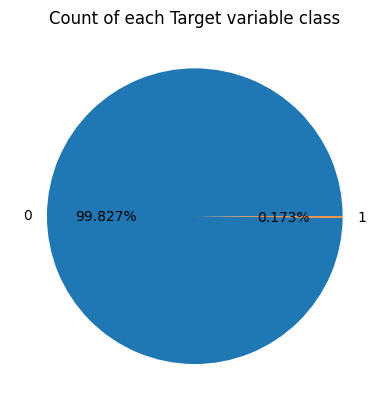

In [10]:
#Analyzing uniquiness in dataset
# Get labels or values for the target variable  
labels = df.Class.unique()

# Each class value counts (0, 1)
sizes = df.Class.value_counts().values

#Plotting to see the pattern 
fig, ax = plt.subplots()
#Pie - chat 
ax.pie(sizes, labels= labels, autopct='%1.3f%%')
ax.set_title("Count of each Target variable class")
plt.show()

- Only 0.173% of the transaction from credit card is failing out of 284807 transactions 
- We need to check the target value correlation with other independent variable's (feature variables)

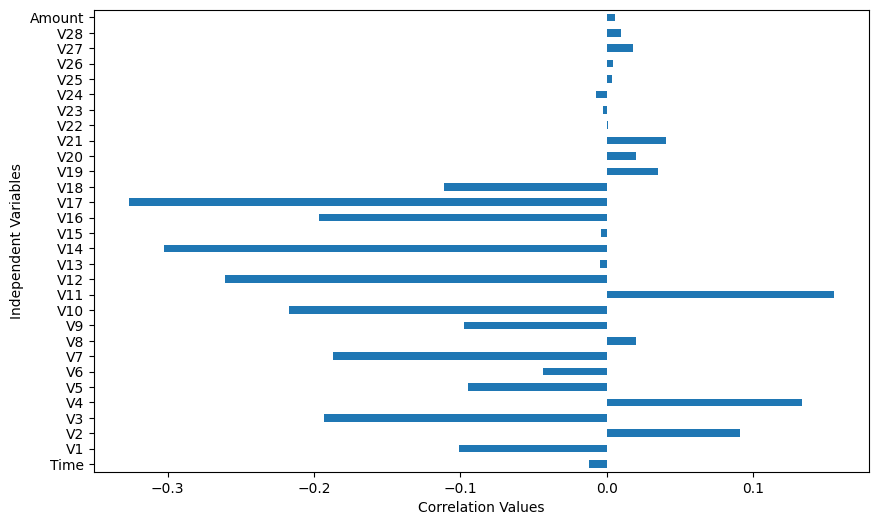

In [20]:
#Correlation with "Class" variables 
correlation = df.corr()['Class'].drop(['Class'])

#Visualizing the correlations 
correlation.plot(kind= 'barh', figsize= (10, 6))
plt.xlabel("Correlation Values")
plt.ylabel("Independent Variables")
plt.show()


### Data Analysis Conclusion
- Time variable is negatively correlated with target 'Class' variable, so we can drop this feature 
- Data Preprocessing applying standarization and Normalization technique on the numerical independent variables 
- *We use Data Preprocessing to make the model converge quickly and correctly*. 

In [35]:
#Data Preprocessing 
from sklearn.preprocessing import StandardScaler, normalize

#Standard scaler in independent variable
# index 0: - Time (exxluding)
# index 31: - Class (Target variable excluding) 
ind_features = df.iloc[:, 1:30].values
ind_features = StandardScaler().fit_transform(ind_features)

#Normalize independent features
#Use norm = l1 and copy it to ind_features variable
ind_features = normalize(ind_features, norm= 'l1', copy= False)


In [37]:
#Determining indepndent and dependent variables 
X = ind_features

Y = df.iloc[:, 30].values

In [38]:
#Model Selection 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

### Assiging weight to target variable 

1. Features 
    - **Imbalanced Datasets**: If one class appears much more often than another (say 95% vs. 5%), the model may just learn to always predict the majority class. Weighted samples help counteract this imbalance.

    - **Custom Priorities**: You may want some samples (e.g., recent data, higher quality data, or rare classes) to influence training more.

    - **Fairness in Learning**: Ensures that each class contributes proportionally, not just by raw count.

2. Modes of compute_sample_weight
    - "balanced" → assigns weights inversely proportional to class frequency
    - "balanced_subsample" → same idea but for bootstrap samples (in ensemble methods like RandomForest)
    - custom class_weight dict → assign manual weights

In [40]:
#Assigning balanced weights to target variables 
from sklearn.utils import compute_sample_weight

#Making target varialbe from in-comparable to comparable 
weight_train = compute_sample_weight(class_weight= "balanced", y= y_train)

In [42]:
#Decision Tree Training 
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4, random_state= 35)

#Training the model 
decision_tree.fit(x_train, y_train, sample_weight= weight_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,35
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [44]:
#LinearSVM Training (LinearSVC -> Suppport Vector Classification )
from sklearn.svm import LinearSVC

svm_classify = LinearSVC(class_weight= 'balanced', loss= 'hinge', random_state= 35, fit_intercept= False)

#Training SVM model 
svm_classify.fit(x_train, y_train)

,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,False
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,35


### TODO: - Evaluation of Decision Tree and Support Vector Classificatin 